## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import glob

from google.colab import drive
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

## Mounting Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Declaring Data Paths

In [3]:
base_path = '/content/drive/MyDrive/'

train = '/content/drive/MyDrive/Train' 
test = '/content/drive/MyDrive/Test'
val = '/content/drive/MyDrive/Val'

## Visualisation of Datasets

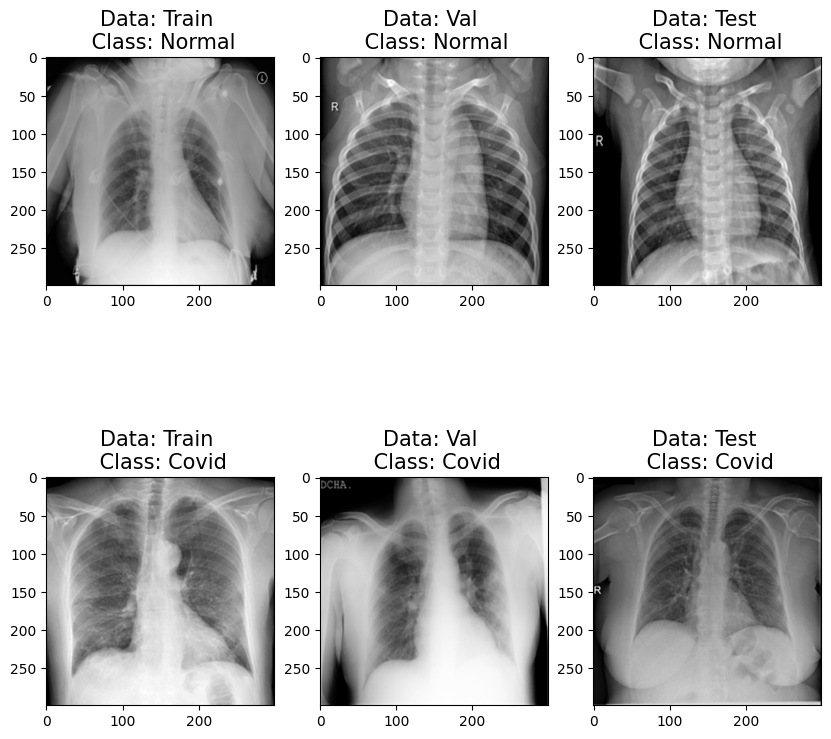

In [4]:
fig, ax = plt.subplots(2,3, figsize = (10, 10))
ax = ax.ravel()

for i, var in enumerate(['Train', 'Val', 'Test']):
    normal_set = glob.glob(base_path + "/"+ var +"/Normal/*.png")
    covid_set = glob.glob(base_path + "/"+ var + "/COVID/*.png")
    ax[i].imshow(plt.imread(normal_set[0]), cmap = 'gray')
    ax[i].set_title('Data: {} \n Class: Normal'.format(var), fontsize = 15)
    ax[i+3].imshow(plt.imread(covid_set[0]), cmap = 'gray')
    ax[i+3].set_title('Data: {} \n Class: Covid'.format(var), fontsize = 15)

## Representing Training DataSet

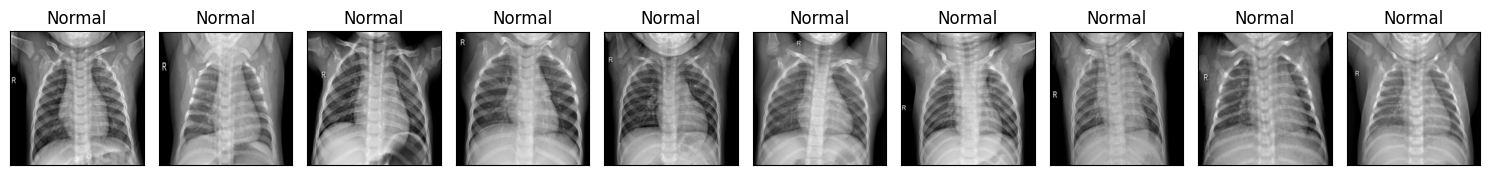

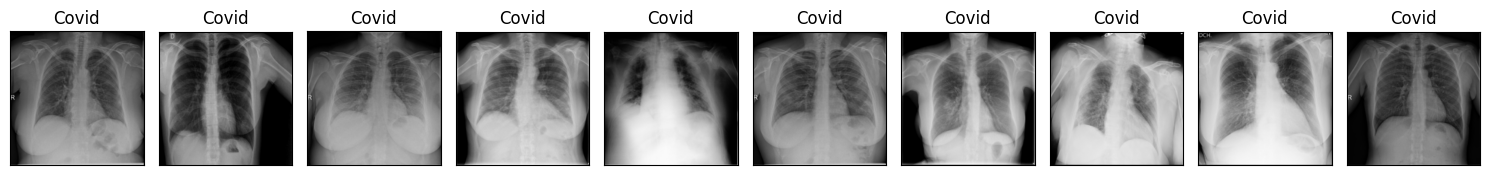

In [5]:
s = (256, 256)

fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(normal_set[i])
    img = cv2.resize(img, s)
    ax.imshow(img)
    ax.set_title("Normal")
fig.tight_layout()    
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(covid_set[i])
    img = cv2.resize(img, s)
    ax.imshow(img)
    ax.set_title("Covid")
fig.tight_layout()
plt.show()

## AlexNet

In [6]:
# Create the data generators for training and testing
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train,target_size=(227,227),batch_size=64,class_mode='binary')

validation_generator = test_datagen.flow_from_directory(val, target_size=(227, 227),batch_size=64,class_mode='binary')

Found 5786 images belonging to 2 classes.
Found 722 images belonging to 2 classes.


In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Initialize the Sequence Model
model = Sequential()

# Adding the Convolution Layer
model.add(Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(227, 227, 3)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(256, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(384, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(384, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Add the fully connected layer
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# Train the model on the training data
history_AlexNet = model.fit(train_generator, validation_data = validation_generator, epochs=50, batch_size=64)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(validation_generator, verbose=0)
print('Val loss:', loss)
print('Val accuracy:', accuracy)

# Evaluate the model on the train data
loss, accuracy = model.evaluate(train_generator, verbose=0)
print('Train loss:', loss)
print('Train accuracy:', accuracy)

Epoch 1/50
91/91 [==============================] - 95s 1s/step - loss: 0.6933 - accuracy: 0.4922 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/50
91/91 [==============================] - 95s 1s/step - loss: 0.6935 - accuracy: 0.4851 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/50
91/91 [==============================] - 95s 1s/step - loss: 0.6933 - accuracy: 0.4983 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/50
91/91 [==============================] - 98s 1s/step - loss: 0.6934 - accuracy: 0.4948 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/50
91/91 [==============================] - 93s 1s/step - loss: 0.6931 - accuracy: 0.5028 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/50
91/91 [==============================] - 95s 1s/step - loss: 0.6933 - accuracy: 0.4908 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/50
91/91 [==============================] - 96s 1s/step - loss: 0.6935 - accuracy: 0.4905 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/50
91/91 [==

In [12]:
model.save("AlexNet.h5")
np.save("AlexNet.npy",history_AlexNet.history)

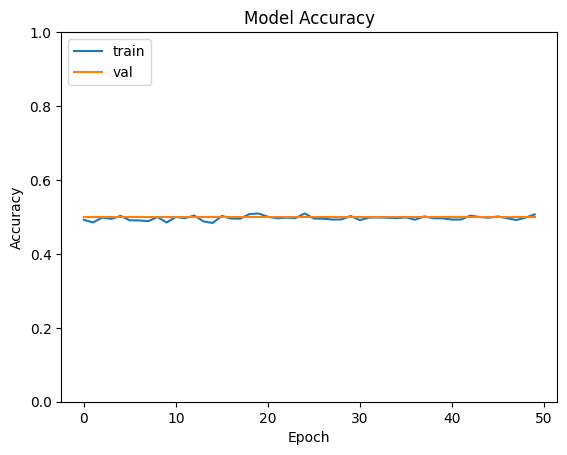

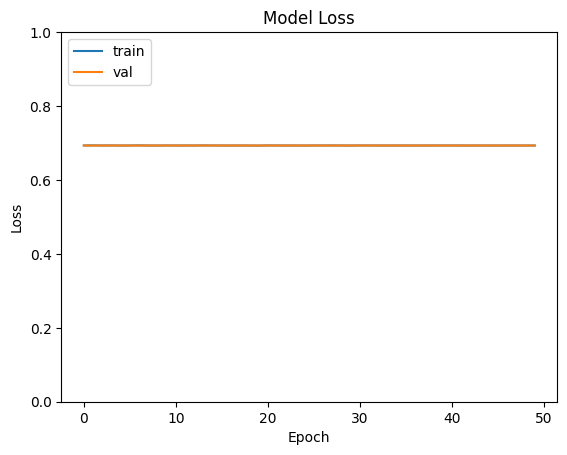

In [14]:
import matplotlib.pyplot as plt

# assume your model's training history is stored in a variable called 'history'

# plot accuracy
plt.plot(history_AlexNet.history['accuracy'])
plt.plot(history_AlexNet.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim([0, 1])
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# plot loss
plt.plot(history_AlexNet.history['loss'])
plt.plot(history_AlexNet.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim([0, 1])
plt.legend(['train', 'val'], loc='upper left')
plt.show()
